
## Idea: People below 40 years of age tend to have longer trips as compared to riders above 40 years of age.

# NULL HYPOTHESIS:

## The average trip duration for people equal and above the age of 40 is greater than or equal to the average trip duration for people less than the age of 40.

# _$H_0$_ : $\mu_A >= \mu_B$
# _$H_1$_ : $\mu_A < \mu_B$
### Or identically:
# _$H_0$_ : $\mu_A - \mu_B$ >= 0
# _$H_1$_ : $\mu_A - \mu_B$ <0
## Where
   ### $\mu_A$ : Average trip duration for people equal and above the age of 40 
   ### $\mu_B$: Average trip duration for people below the age of 40.
   
## We will use a significance level  $\alpha=0.05$

In [1]:
import os
import matplotlib.pylab as plt
import zipfile
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
!curl https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip?accessType=DOWNLOAD>201601-citibike-tripdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  51.0M      0 --:--:-- --:--:-- --:--:-- 51.1M


In [3]:
zip_ref = zipfile.ZipFile("201601-citibike-tripdata.zip", 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + '201601-citibike-tripdata.csv')

In [5]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
509473,1275,1/31/2016 23:58:20,2/1/2016 00:19:36,3135,E 75 St & 3 Ave,40.771129,-73.957723,168,W 18 St & 6 Ave,40.739713,-73.994564,17640,Subscriber,1982.0,1
509474,1576,1/31/2016 23:58:39,2/1/2016 00:24:55,268,Howard St & Centre St,40.719105,-73.999733,3113,Greenpoint Ave & Manhattan Ave,40.730260,-73.953940,23324,Subscriber,1978.0,1
509475,356,1/31/2016 23:58:54,2/1/2016 00:04:51,441,E 52 St & 2 Ave,40.756014,-73.967416,501,FDR Drive & E 35 St,40.744219,-73.971212,24203,Subscriber,1990.0,1
509476,1128,1/31/2016 23:59:13,2/1/2016 00:18:02,475,E 16 St & Irving Pl,40.735243,-73.987586,264,Maiden Ln & Pearl St,40.707065,-74.007319,24272,Subscriber,1990.0,1
509477,851,1/31/2016 23:59:26,2/1/2016 00:13:38,377,6 Ave & Canal St,40.722438,-74.005664,509,9 Ave & W 22 St,40.745497,-74.001971,22211,Subscriber,1988.0,1


In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [7]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'],axis =1, inplace = True)

Creating a field called age which is the difference of the current year(2016 for the data) from the birth year of the users

In [8]:
df['age'] = 2016-df['birth year']

In [9]:
df.head()

,tripduration,birth year,age
0,923,1958.0,58.0
1,379,1969.0,47.0
2,589,1982.0,34.0
3,889,1961.0,55.0
4,1480,1952.0,64.0


In [10]:
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,birth year,age
count,5.094780e+05,484933.000000,484933.000000
mean,8.472119e+02,1975.996863,40.003137
std,7.396954e+03,11.679123,11.679123
min,6.100000e+01,1885.000000,16.000000
25%,3.310000e+02,NaN,NaN
50%,5.230000e+02,NaN,NaN
75%,8.430000e+02,NaN,NaN
max,1.960017e+06,2000.000000,131.000000


We see there are NaN values for the birth year and age. So we drop these records.

In [11]:
df.dropna(inplace = True)

In [12]:
df.describe()

,tripduration,birth year,age
count,4.849330e+05,484933.000000,484933.000000
mean,7.651543e+02,1975.996863,40.003137
std,6.485651e+03,11.679123,11.679123
min,6.100000e+01,1885.000000,16.000000
25%,3.250000e+02,1968.000000,31.000000
50%,5.070000e+02,1978.000000,38.000000
75%,8.010000e+02,1985.000000,48.000000
max,1.960017e+06,2000.000000,131.000000


Text(0,0.5,'Trip Duration')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


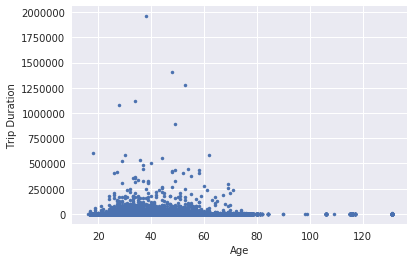

In [13]:
plt.plot( df['age'], df['tripduration'], '.')
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Trip Duration", fontsize = 10)

Figure 1: This plot shows the trip duration for each entry of age.

In [14]:
df_A = df[df['age']>=40]
average_A = df_A['tripduration'].sum()/len(df_A.index)
average_A

799.02238603962894

In [15]:
df_B = df[df['age']<40]
average_B = df_B['tripduration'].sum()/len(df_B.index)
average_B

736.64031039551503

Text(0,0.5,'Average tripduration')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


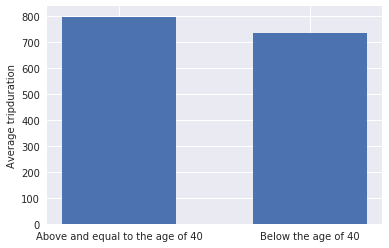

In [16]:
plt.bar(['Above and equal to the age of 40','Below the age of 40'],[average_A,average_B], alpha=1,width = 0.6)
plt.ylabel("Average tripduration" , fontsize =10)

Figure 2: This is the bar chart comparing the average trip duration for the two groups.

In [17]:
df_age = df

In [18]:
df_age = df_age.groupby(['age'], as_index=False).mean()

Text(0,0.5,'Tripduration')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


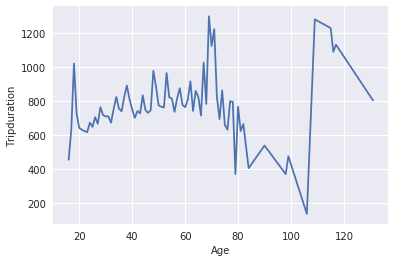

In [19]:
plt.plot( df_age['age'], df_age['tripduration'], '-')
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Tripduration", fontsize = 10)

Figure 3: This shows the average trip duration for each age value.

In [20]:
t, p = ttest_ind(df_age.tripduration[df_age.age>=40], df_age.tripduration[df_age.age<40], equal_var=False)
print("ttest_ind:   t = %g  p/2 = %g" % (t, p/2))

ttest_ind:   t = 2.07174  p/2 = 0.0208794


This is a one tailed t-test for which we are checking only the right tail which is when t>0. The equal_var parameter is false, and performs Welch’s t-test, which does not assume equal population variance. The p/2 value is less than 0.05 and hence it isnt significant therefore we reject the null hypothesis that riders above and equal to the age of 40 have longer trips on average than those below the age of 40. 

In [21]:
df_age['Age_Group'] =  df_age['age'].map(lambda x: 'Below 40' if x < 40 else 'Equal and above 40')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


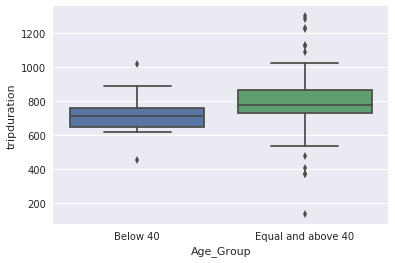

In [22]:
sns.boxplot(x=df_age.Age_Group, y=df_age.tripduration)

Comparison of the distributions of the two groups using a box and whisker plot. 